<a href="https://colab.research.google.com/github/sunyoungmoon012/first-repository/blob/master/Quest_03_AARRR_%EB%B6%84%EC%84%9D_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd


df1 = pd.read_excel('/content/drive/MyDrive/online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2 = pd.read_excel('/content/drive/MyDrive/online_retail_II.xlsx', sheet_name='Year 2010-2011')
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [5]:
# 1. InvoiceDate를 datetime 형식으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 2. Customer ID가 결측인 행 제거
df = df.dropna(subset=['Customer ID'])

# 3. Customer ID를 정수형으로 변환
df['Customer ID'] = df['Customer ID'].astype(int)

# 4. InvoiceDate를 기준으로 정렬
df = df.sort_values('InvoiceDate')

# 5. Total 컬럼 생성 (Quantity * Price)
df['Total'] = df['Quantity'] * df['Price']

# 결과 확인
df.head()

<ipython-input-5-f10050556fc9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer ID'] = df['Customer ID'].astype(int)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
 8   Total        824364 non-null  float64       
 9   YearMonth    824364 non-null  period[M]     
 10  Quarter      824364 non-null  period[Q-DEC] 
 11  Cohort       824364 non-null  period[Q-DEC] 
 12  CohortIndex  824364 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4), period[M](1), period[Q-DEC](2)
memory usage: 88.1+ MB


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

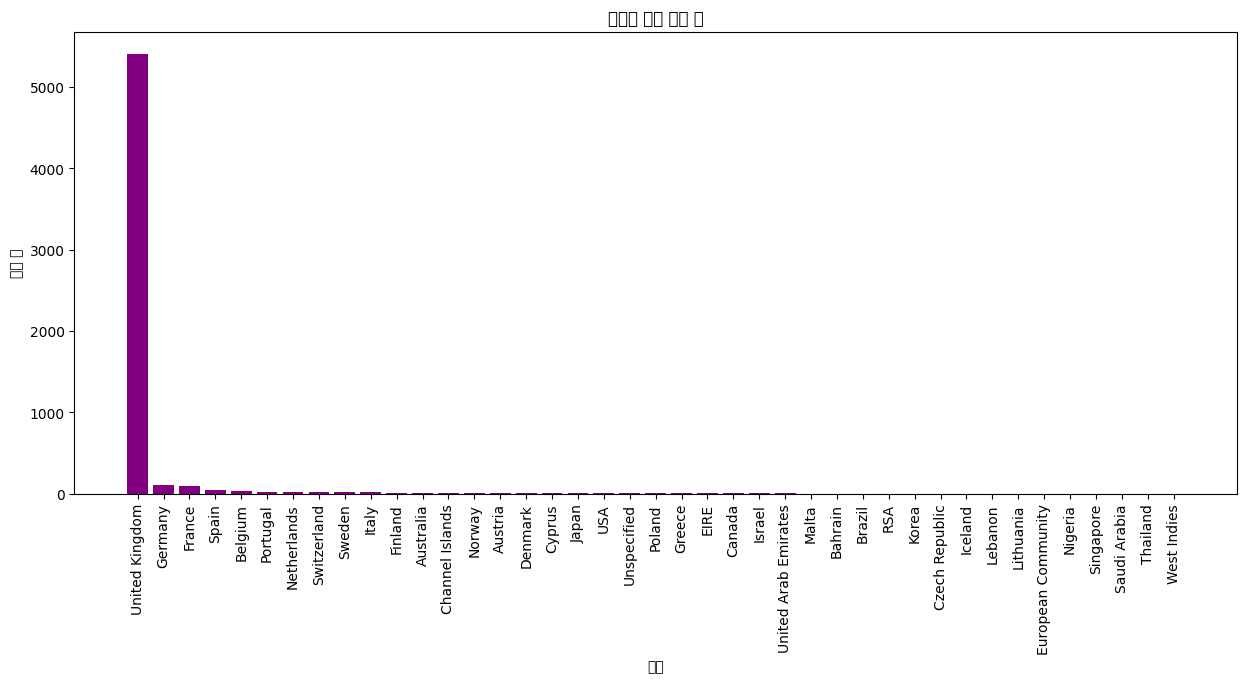

In [15]:
# 1. 나라별로 고유한 고객 수 세기
country_customer_count = df.groupby('Country')['Customer ID'].nunique()

# 2. 고객 수 많은 순서로 정렬
country_customer_count = country_customer_count.sort_values(ascending=False)

# 3. 그래프로 보기
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))  # 그래프 크기 키우기
plt.bar(country_customer_count.index, country_customer_count.values, color='purple')  # 보라색 막대그래프
plt.title('나라별 고유 고객 수')
plt.xlabel('나라')
plt.ylabel('고객 수')
plt.xticks(rotation=90)  # 나라 이름 옆으로 눕히기
plt.show()



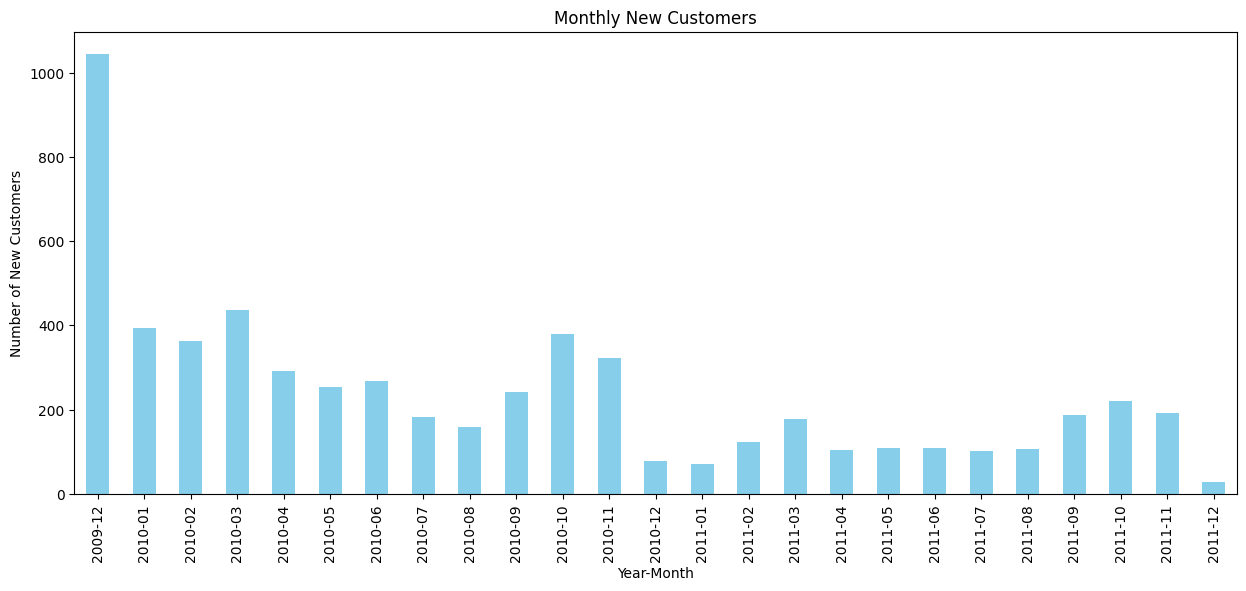

In [7]:
# 1. YearMonth 컬럼 만들기
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# 2. 고객별 첫 구매 날짜 찾기
first_purchase = df.groupby('Customer ID')['InvoiceDate'].min().to_frame()

# 3. 첫 구매 날짜를 YearMonth로 변환
first_purchase['YearMonth'] = first_purchase['InvoiceDate'].dt.to_period('M')

# 4. 월별 신규 고객 수 세기
new_customers_per_month = first_purchase.groupby('YearMonth').size()

# 5. 그래프 그리기
plt.figure(figsize=(15,6))
new_customers_per_month.plot(kind='bar', color='skyblue')
plt.title('Monthly New Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.show()

In [8]:
# 1. 고객별 총 구매 금액 계산
customer_total = df.groupby('Customer ID')['Total'].sum()

# 2. 전체 고객 수
total_customers = customer_total.shape[0]

# 3. 총 구매금액 50 이상 고객 수
activated_customers = customer_total[customer_total >= 50].shape[0]

# 4. 활성화율 계산
activation_rate = activated_customers / total_customers * 100

# 5. 결과 출력
print(f"총 고객 수: {total_customers}")
print(f"활성화된 고객 수: {activated_customers}")
print(f"고객 활성화율: {activation_rate:.2f}%")

총 고객 수: 5942
활성화된 고객 수: 5777
고객 활성화율: 97.22%


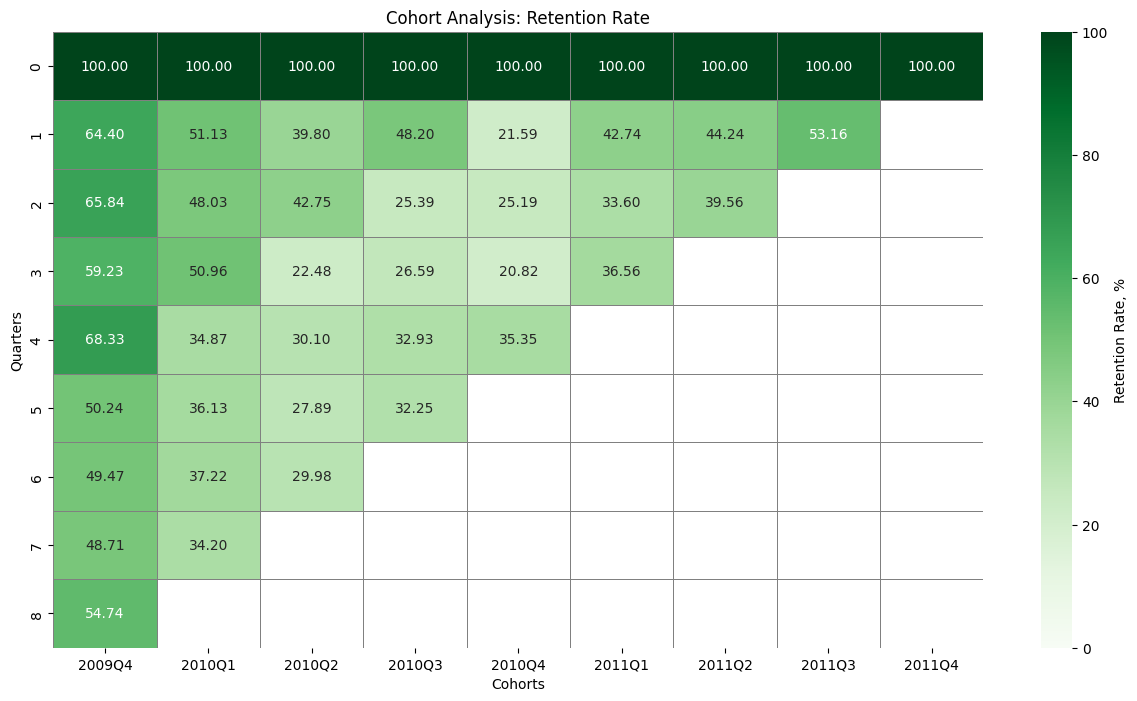

In [9]:
import seaborn as sns


# 1. 분기로 만들기
df['Quarter'] = df['InvoiceDate'].dt.to_period('Q')

# 2. 첫 구매 분기(Cohort) 찾기
df['Cohort'] = df.groupby('Customer ID')['Quarter'].transform('min')

# 3. 첫 구매 후 몇 분기 지났는지 (0,1,2...) 계산
df['CohortIndex'] = (df['Quarter'] - df['Cohort']).apply(lambda x: x.n)

# 4. Cohort별 + CohortIndex별 고객 수 세기
cohort_counts = df.groupby(['Cohort', 'CohortIndex'])['Customer ID'].nunique().unstack(0)

# 5. 유지율(%) 계산
retention = cohort_counts.divide(cohort_counts.iloc[0], axis=1) * 100

# 6. 히트맵 그리기
plt.figure(figsize=(15,8))
sns.heatmap(
    data=retention,
    annot=True, fmt='.2f',
    cmap='Greens',
    cbar_kws={'label': 'Retention Rate, %'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0, vmax=100
)
plt.title('Cohort Analysis: Retention Rate')
plt.ylabel('Quarters')
plt.xlabel('Cohorts')
plt.show()